In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def conv2d_to_matmul(input, conv_layer):
    # Extract Conv2D parameters
    in_channels = conv_layer.in_channels
    out_channels = conv_layer.out_channels
    kernel_size = conv_layer.kernel_size
    stride = conv_layer.stride
    padding = conv_layer.padding
    dilation = conv_layer.dilation

    # Unfold (im2col) the input tensor
    input_unf = F.unfold(input, kernel_size=kernel_size, dilation=dilation, padding=padding, stride=stride)

    # Reshape the weight tensor of the conv layer
    weight = conv_layer.weight.view(out_channels, -1)

    # Perform matrix multiplication
    output_unf = weight @ input_unf

    # Reshape the output to the correct dimensions
    output_height = (input.size(2) + 2*padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) // stride[0] + 1
    output_width = (input.size(3) + 2*padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) // stride[1] + 1
    output = output_unf.view(1, out_channels, output_height, output_width)

    return output

# Example usage
input = torch.randn(1, 3, 5, 5)  # Batch size 1, 3 channels, 5x5 image
conv_layer = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, stride=1, padding=1)

# Get the output using the conv2d_to_matmul function
output = conv2d_to_matmul(input, conv_layer)

# Verify against the standard convolution
conv_output = conv_layer(input)

print("Output from matrix multiplication:")
print(output)

print("Output from standard convolution:")
print(conv_output)

# Verify that the outputs are the same
print("Difference between outputs:", torch.abs(output - conv_output).max())


Output from matrix multiplication:
tensor([[[[-0.2798, -0.0576,  0.4760, -0.0022,  0.5965],
          [-0.3831, -0.6861,  0.1310, -0.2115,  0.6901],
          [ 0.1581, -0.3168, -0.4913, -0.9078, -0.0365],
          [-0.1768, -0.2058, -1.0859, -0.3986, -0.3868],
          [-0.3603, -0.2312, -1.2773, -0.3161,  0.3108]],

         [[ 0.1639,  0.0842,  0.9165, -0.2983, -0.2242],
          [-0.0229, -0.0566, -0.1032, -0.2204, -0.1244],
          [ 0.2391,  0.2545,  0.6743, -0.2300, -0.2058],
          [-0.1515,  0.7881,  0.5873, -0.8179, -0.1022],
          [ 0.1383, -0.2363, -0.0521, -0.9489, -0.5987]]]],
       grad_fn=<ViewBackward0>)
Output from standard convolution:
tensor([[[[-0.4578, -0.2355,  0.2980, -0.1801,  0.4185],
          [-0.5611, -0.8640, -0.0470, -0.3895,  0.5121],
          [-0.0199, -0.4947, -0.6693, -1.0858, -0.2144],
          [-0.3547, -0.3838, -1.2639, -0.5765, -0.5648],
          [-0.5383, -0.4092, -1.4553, -0.4941,  0.1328]],

         [[ 0.2126,  0.1329,  0.9652,

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def conv2d_to_matmul(input, conv_layer):
    # Extract Conv2D parameters
    in_channels = conv_layer.in_channels
    out_channels = conv_layer.out_channels
    kernel_size = conv_layer.kernel_size
    stride = conv_layer.stride
    padding = conv_layer.padding
    dilation = conv_layer.dilation

    # Unfold (im2col) the input tensor
    input_unf = F.unfold(input, kernel_size=kernel_size, dilation=dilation, padding=padding, stride=stride)

    # Reshape the weight tensor of the conv layer
    weight = conv_layer.weight.view(out_channels, -1)

    # Perform matrix multiplication
    output_unf = weight @ input_unf

    # Add the bias
    if conv_layer.bias is not None:
        output_unf += conv_layer.bias.unsqueeze(1)

    # Reshape the output to the correct dimensions
    output_height = (input.size(2) + 2*padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) // stride[0] + 1
    output_width = (input.size(3) + 2*padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) // stride[1] + 1
    output = output_unf.view(1, out_channels, output_height, output_width)

    return output

# Example usage
input = torch.randn(1, 3, 5, 5)  # Batch size 1, 3 channels, 5x5 image
conv_layer = nn.Conv2d(in_channels=3, out_channels=2, kernel_size=3, stride=1, padding=1)

# Get the output using the conv2d_to_matmul function
output = conv2d_to_matmul(input, conv_layer)

# Verify against the standard convolution
conv_output = conv_layer(input)

print("Output from matrix multiplication:")
print(output)

print("Output from standard convolution:")
print(conv_output)

# Verify that the outputs are the same
print("Difference between outputs:", torch.abs(output - conv_output).max())


Output from matrix multiplication:
tensor([[[[ 0.0647, -0.8771,  0.1172, -0.5919, -0.2884],
          [-0.3678,  0.0288, -0.7642,  0.3269,  0.8414],
          [-0.6333,  0.6534, -0.2398, -0.1189,  0.4273],
          [ 0.0820, -0.0814,  0.0694, -0.1249, -0.5725],
          [ 0.0334, -0.4556, -0.1662,  0.8488, -0.5382]],

         [[ 0.1186,  0.5653, -0.8192,  0.3583,  0.0349],
          [ 0.4989,  0.4936,  1.6190,  0.3322,  0.5158],
          [ 0.5491, -0.8562,  0.6179, -0.2699, -0.4139],
          [-0.1246,  0.0294,  0.9565, -0.3862,  0.1130],
          [ 0.3713,  0.5061, -0.0591,  0.4057,  0.5807]]]],
       grad_fn=<ViewBackward0>)
Output from standard convolution:
tensor([[[[ 0.0647, -0.8771,  0.1172, -0.5919, -0.2884],
          [-0.3678,  0.0288, -0.7642,  0.3269,  0.8414],
          [-0.6333,  0.6534, -0.2398, -0.1189,  0.4273],
          [ 0.0820, -0.0814,  0.0694, -0.1249, -0.5725],
          [ 0.0334, -0.4556, -0.1662,  0.8488, -0.5382]],

         [[ 0.1186,  0.5653, -0.8192,

In [68]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def conv2d_to_matmul(input, conv_layer):


    out_channels = conv_layer.out_channels
    kernel_size = conv_layer.kernel_size
    stride = conv_layer.stride
    padding = conv_layer.padding
    dilation = conv_layer.dilation

 
    input_unf = F.unfold(input, kernel_size=kernel_size, dilation=dilation, padding=padding, stride=stride)

    weight = conv_layer.weight.view(out_channels, -1)


    output_unf = weight @ input_unf

    if conv_layer.bias is not None:
        output_unf += conv_layer.bias.unsqueeze(1)

    output_height = (input.size(2) + 2*padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) // stride[0] + 1
    output_width = (input.size(3) + 2*padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) // stride[1] + 1
    output = output_unf.view(1, out_channels, output_height, output_width)

    return output


with torch.no_grad():
    input = torch.randn(1, 3, 55, 55)  
    conv_layer = nn.Conv2d(in_channels=3, out_channels=20, kernel_size=3, stride=1, padding=1)

    output = conv2d_to_matmul(input, conv_layer)


    conv_output = conv_layer(input)

print("Output from matrix multiplication:")
print(output)

print("Output from standard convolution:")
print(conv_output)


print("Difference between outputs:", torch.abs(output - conv_output).max())

Output from matrix multiplication:
tensor([[[[-5.9511e-01,  2.4230e-02,  8.9785e-01,  ..., -5.9544e-03,
            5.1965e-01,  2.6802e-01],
          [ 5.0542e-01, -2.6269e-01, -3.3766e-01,  ...,  6.4516e-01,
           -4.6110e-01,  8.7037e-02],
          [-8.9443e-01, -3.3619e-01,  3.2683e-01,  ..., -3.8791e-01,
            5.8959e-01, -7.0960e-01],
          ...,
          [-5.3951e-02, -1.2812e+00,  1.8055e+00,  ...,  2.8394e-02,
            1.3544e-01, -1.3282e-01],
          [ 4.2357e-01,  6.8827e-01, -6.9377e-01,  ...,  8.3338e-01,
           -2.9679e-02,  4.1256e-01],
          [-4.0692e-01,  4.5084e-01,  5.2870e-02,  ...,  5.9891e-02,
            7.7406e-01, -3.9062e-04]],

         [[-3.6356e-02,  2.5435e-01,  7.3083e-01,  ...,  2.0529e-01,
            6.9218e-01,  4.0681e-01],
          [ 3.2843e-01,  6.3511e-01,  9.3635e-01,  ...,  3.1694e-01,
            1.1242e-01,  1.1595e-01],
          [-6.0154e-01, -1.3192e-01,  1.2443e-01,  ..., -5.0678e-01,
           -4.8619e-01,

In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd.functional import jacobian

def spectral_norm(matrix):
    u, s, v = torch.svd(matrix, some=True)
    return s.max()

def lipschitz_constant(network, input_shape):
    lipschitz_constants = []

    def register_hook(layer):
        if isinstance(layer, (nn.Linear, nn.Conv2d)):
            def hook(module, input, output):
                if isinstance(module, nn.Linear):
                    weight = module.weight.data
                elif isinstance(module, nn.Conv2d):
                    weight = module.weight.data.view(module.out_channels, -1)
                lipschitz_constants.append(spectral_norm(weight))
            return layer.register_forward_hook(hook)

    hooks = []
    for layer in network.modules():
        hook = register_hook(layer)
        if hook:
            hooks.append(hook)

    input_tensor = torch.randn(*input_shape)
    network(input_tensor)


    for hook in hooks:
        hook.remove()


    total_lipschitz_constant = torch.prod(torch.tensor(lipschitz_constants))

    return total_lipschitz_constant.item()


In [78]:
import torchvision.models as models

model = models.vgg19(weights=models.VGG19_Weights.DEFAULT)
input_shape = (1, 3, 224, 224
               ) 
lipschitz_const = lipschitz_constant(model, input_shape)
print(f"Constante de Lipschitz du réseau: {lipschitz_const}")

Constante de Lipschitz du réseau: 721536352256.0


In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

def find_maximizing_input(network, target_class, input_shape, num_iterations=300, learning_rate=0.01):
 
    input_tensor = torch.randn(input_shape, requires_grad=True)

    optimizer = optim.Adam([input_tensor], lr=learning_rate)

    for iteration in range(num_iterations):
        optimizer.zero_grad()

        output = network(input_tensor)

        target_output = output[0, target_class]

        loss = -target_output

     
        loss.backward()

        optimizer.step()

        with torch.no_grad():
            input_tensor.clamp_(0, 1)  

        if iteration % 10 == 0:
            print(f"Iteration {iteration}, Loss: {loss.item()}")

    return input_tensor

vgg19 = models.vgg19(pretrained=True)

input_shape = (1, 3, 224, 224)
target_class = 1

maximizing_input = find_maximizing_input(vgg19, target_class, input_shape)

print("Tenseur d'entrée qui maximise la sortie:")
print(maximizing_input)


/home/guillaume/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/guillaume/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Iteration 0, Loss: 2.0617432594299316
Iteration 10, Loss: -5.5193915367126465
Iteration 20, Loss: -10.756346702575684
Iteration 30, Loss: -22.763427734375
Iteration 40, Loss: -54.74723434448242
Iteration 50, Loss: -74.90886688232422
Iteration 60, Loss: -114.947021484375
Iteration 70, Loss: -128.90609741210938
Iteration 80, Loss: -145.79978942871094
Iteration 90, Loss: -203.3134002685547
Iteration 100, Loss: -190.97267150878906
Iteration 110, Loss: -243.62135314941406
Iteration 120, Loss: -260.3282775878906
Iteration 130, Loss: -265.938232421875
Iteration 140, Loss: -329.7197570800781
Iteration 150, Loss: -340.07586669921875
Iteration 160, Loss: -359.0157165527344
Iteration 170, Loss: -412.3768005371094
Iteration 180, Loss: -386.5377502441406
Iteration 190, Loss: -403.0248107910156
Iteration 200, Loss: -494.2942199707031
Iteration 210, Loss: -459.6971130371094
Iteration 220, Loss: -498.4586486816406
Iteration 230, Loss: -463.32598876953125
Iteration 240, Loss: -489.6029968261719
Iterati

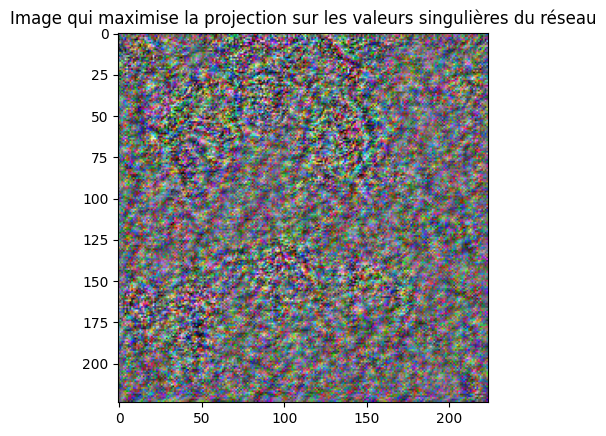

In [144]:
import numpy as np
import matplotlib.pyplot as plt
maximizing_input_np = maximizing_input_1_t.squeeze(0).detach().numpy()
maximizing_input_np = np.transpose(maximizing_input_np, (1, 2, 0))

# Afficher l'image qui maximise la sortie du réseau
plt.imshow(maximizing_input_np)
plt.title("Image qui maximise la projection sur les valeurs singulières du réseau")
plt.show()

In [142]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

def find_maximizing_input(network, num_iterations=100, learning_rate=0.01,input_tensor = torch.randn(3,224,224),ortho = 1,svd_rank = 0):
    # Initialiser une entrée aléatoire

    #input_tensor = maximizing_input_2

    # Définir l'optimiseur
    optimizer = optim.Adam([input_tensor], lr=learning_rate)

    for iteration in range(num_iterations):
        optimizer.zero_grad()

        # Calculer la sortie du réseau
        output = input_tensor
        projections = []

        for layer in network.children():
            if isinstance(layer, nn.Conv2d):
                weight = layer.weight.data.view(layer.out_channels, -1)
                u, s, v = torch.svd(weight)
                v1 = v[:, svd_rank] 
                output_unfolded = F.unfold(output, kernel_size=layer.kernel_size, padding=layer.padding, stride=layer.stride)
                projection = torch.matmul(v1, output_unfolded)
                projections.append(projection)
                output = layer(output)
            elif isinstance(layer, nn.Linear):
                weight = layer.weight.data
                u, s, v = torch.svd(weight)
                v1 = v[:, svd_rank]  
                projection = torch.matmul(v1, output.view(output.size(0), -1).t())
                projections.append(projection)
                output = layer(output.view(output.size(0), -1))
            elif isinstance(layer, nn.Sequential) or isinstance(layer, nn.ReLU) or isinstance(layer, nn.MaxPool2d):
                output = layer(output)
            else:
                raise NotImplementedError(f"Layer type {type(layer)} is not supported.")

        total_projection = sum(torch.norm(p) for p in projections)

      
        loss = -ortho*total_projection

        loss.backward()

       
        optimizer.step()

        with torch.no_grad():
            input_tensor.clamp_(0, 1) 

        if iteration % 10 == 0:
            print(f"Iteration {iteration}, Loss: {loss.item()}")

    return input_tensor


vgg19 = models.vgg19(pretrained=True)


input_shape = (1, 3, 224, 224)

input_tensor_0 = torch.randn(3,224,224, requires_grad=True)
#maximizing_input_0 = find_maximizing_input(vgg19.features, input_tensor = input_tensor, ortho = 1,svd_rank=0)
#maximizing_input_0_t = find_maximizing_input(vgg19.features, input_tensor = input_tensor, ortho = -1,svd_rank=0)
maximizing_input_1 = find_maximizing_input(vgg19.features, input_tensor = input_tensor_0, ortho = 1,svd_rank=1)
maximizing_input_1_t = find_maximizing_input(vgg19.features, input_tensor = input_tensor_0, ortho = -1,svd_rank=1)
maximizing_input_2 = find_maximizing_input(vgg19.features, input_tensor = input_tensor_0, ortho = 1,svd_rank=2)
maximizing_input_2_t = find_maximizing_input(vgg19.features, input_tensor = input_tensor_0, ortho = -1,svd_rank=2)


/home/guillaume/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/guillaume/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Iteration 0, Loss: -7564.78955078125
Iteration 10, Loss: -4967.27783203125
Iteration 20, Loss: -6378.22265625
Iteration 30, Loss: -7957.87353515625
Iteration 40, Loss: -9536.0673828125
Iteration 50, Loss: -10979.8369140625
Iteration 60, Loss: -12276.072265625
Iteration 70, Loss: -13437.1650390625
Iteration 80, Loss: -14480.3505859375
Iteration 90, Loss: -15422.17578125
Iteration 0, Loss: 16265.861328125
Iteration 10, Loss: 11482.7646484375
Iteration 20, Loss: 6015.66943359375
Iteration 30, Loss: 3934.87255859375
Iteration 40, Loss: 3151.7890625
Iteration 50, Loss: 2584.557861328125
Iteration 60, Loss: 2146.02734375
Iteration 70, Loss: 1791.1370849609375
Iteration 80, Loss: 1503.87744140625
Iteration 90, Loss: 1272.31689453125
Iteration 0, Loss: -1855.98095703125


KeyboardInterrupt: 

In [97]:
torch.max(model(maximizing_input))


tensor(20.8577, grad_fn=<MaxBackward1>)

In [95]:
torch.max(maximizing_input)

tensor(1., grad_fn=<MaxBackward1>)

In [19]:
import torch
u = torch.randn(10000,3,52,52)
x = torch.where(u>0.5,u,0).to_sparse()
y = torch.where(u>0.5,u,0).to_sparse()

(u[0]*x).to_dense().shape



torch.Size([10000, 3, 52, 52])

In [117]:
z=x+y

In [162]:
def dim_chunk(x, available_RAM):
        dense_memory_footprint = torch.prod(torch.tensor(x.shape)) *4/1e9
        return max(1,available_RAM//(4*dense_memory_footprint))
x = torch.randn(1000,1000,100
            )
dim_chunk(x,100)

tensor(20.)

In [ ]:
def conv2d_to_matmul(input, conv_layer):
 
    in_channels = conv_layer.in_channels
    out_channels = conv_layer.out_channels
    kernel_size = conv_layer.kernel_size
    stride = conv_layer.stride
    padding = conv_layer.padding
    dilation = conv_layer.dilation


    input_unf = F.unfold(input, kernel_size=kernel_size, dilation=dilation, padding=padding, stride=stride)


    weight = conv_layer.weight.view(out_channels, -1)

  
    output_unf = weight @ input_unf


    output_height = (input.size(2) + 2*padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) // stride[0] + 1
    output_width = (input.size(3) + 2*padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) // stride[1] + 1
    output = output_unf.view(1, out_channels, output_height, output_width)

    return output

In [11]:
import torch
import torch.nn.functional as F

def conv2d_to_matmul(input, conv_layer):
    in_channels = conv_layer.in_channels
    out_channels = conv_layer.out_channels
    kernel_size = conv_layer.kernel_size
    stride = conv_layer.stride
    padding = conv_layer.padding
    dilation = conv_layer.dilation

    # Calculer la taille de la sortie
    output_height = (input.size(2) + 2 * padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) // stride[0] + 1
    output_width = (input.size(3) + 2 * padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) // stride[1] + 1
    
    # Transformer les poids en une matrice compatible avec l'entrée unfoldée
    weight = conv_layer.weight.view(out_channels, in_channels, -1)
    weight = weight.permute(1, 2, 0).contiguous().view(-1, out_channels)

    # Appliquer un unfold à l'entrée pour préparer les patches
    input_unf = F.unfold(input, kernel_size=kernel_size, dilation=dilation, padding=padding, stride=stride)
    
    # Effectuer la multiplication matricielle
    output_unf = weight.t() @ input_unf

    # Reshaper la sortie unfoldée en la forme d'une image de sortie
    output = output_unf.view(1, out_channels, output_height, output_width)

    return output

# Exemples d'utilisation
input = torch.randn(1, 3, 32, 32)  # Exemples d'entrée
conv_layer = torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)  # Exemple de couche de convolution

output = conv2d_to_matmul(input, conv_layer)
print(output.shape)  # Devrait correspondre à la sortie d'une couche de convolution


torch.Size([1, 16, 32, 32])


In [17]:
import torch
import torch.nn.functional as F

def sparse_conv2d_to_matmul(input_sparse, conv_layer):
    assert input_sparse.layout == torch.sparse_coo, "L'entrée doit être un tenseur sparse."

    in_channels = conv_layer.in_channels
    out_channels = conv_layer.out_channels
    kernel_size = conv_layer.kernel_size
    stride = conv_layer.stride
    padding = conv_layer.padding
    dilation = conv_layer.dilation

    indices = input_sparse._indices()
    values = input_sparse._values()

    # Calculer la taille de la sortie
    input_height, input_width = input_sparse.size(2), input_sparse.size(3)
    output_height = (input_height + 2 * padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) // stride[0] + 1
    output_width = (input_width + 2 * padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) // stride[1] + 1
    
    # Initialiser la sortie sparse
    output = torch.zeros((1, out_channels, output_height, output_width), device=input_sparse.device)

    # Extraire les poids du noyau
    weight = conv_layer.weight.view(out_channels, in_channels, kernel_size[0], kernel_size[1])

    # Appliquer la convolution manuellement
    for i in range(indices.size(1)):
        b, c, h, w = indices[:, i]
        if h >= padding[0] and h < input_height + padding[0] and w >= padding[1] and w < input_width + padding[1]:
            for kh in range(kernel_size[0]):
                for kw in range(kernel_size[1]):
                    if (h - kh * dilation[0] + padding[0]) % stride[0] == 0 and (w - kw * dilation[1] + padding[1]) % stride[1] == 0:
                        h_out = (h - kh * dilation[0] + padding[0]) // stride[0]
                        w_out = (w - kw * dilation[1] + padding[1]) // stride[1]
                        if h_out >= 0 and h_out < output_height and w_out >= 0 and w_out < output_width:
                            output[0, :, h_out, w_out] += weight[:, c, kh, kw] * values[i]

    return output

# Exemple d'utilisation
input_sparse = torch.sparse_coo_tensor(
    indices=[[0, 0, 0, 1], [0, 1, 2, 2], [2, 3, 2, 2], [2, 2, 4, 2]],
    values=[1.0, 2.0, 3.0, 4.0],
    size=(10, 3, 32, 32)
)  # Exemple de tenseur d'entrée sparse

conv_layer = torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)  # Exemple de couche de convolution
conv_layer.bias.data = torch.zeros_like(conv_layer.bias.data)

output = sparse_conv2d_to_matmul(input_sparse, conv_layer)
print(output.shape)  # Devrait correspondre à la sortie d'une couche de convolution
output_2 = conv_layer(input_sparse.to_dense())

torch.Size([1, 16, 32, 32])


In [18]:
output_2-output

tensor([[[[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.3084,  0.7217,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000, -0.7488, -0.5832,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.5381,  0.7474,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000, -0.3536, -0.2622,  ...,  0.0000,  0.0000,  0.0000],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

         [[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.5261, -

In [23]:
import torch
import torch.nn.functional as F
from torch.nn import Conv2d

def construct_convolution_matrix(conv_layer, input_size):
    in_channels = conv_layer.in_channels
    out_channels = conv_layer.out_channels
    kernel_size = conv_layer.kernel_size
    stride = conv_layer.stride
    padding = conv_layer.padding
    dilation = conv_layer.dilation

    input_height, input_width = input_size
    output_height = (input_height + 2 * padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) // stride[0] + 1
    output_width = (input_width + 2 * padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) // stride[1] + 1
    
    weight = conv_layer.weight.view(out_channels, in_channels * kernel_size[0] * kernel_size[1])

    # Matrice de convolution C
    C = torch.zeros(out_channels * output_height * output_width, in_channels * input_height * input_width)

    for oh in range(output_height):
        for ow in range(output_width):
            for kh in range(kernel_size[0]):
                for kw in range(kernel_size[1]):
                    for ic in range(in_channels):
                        ih = oh * stride[0] - padding[0] + kh * dilation[0]
                        iw = ow * stride[1] - padding[1] + kw * dilation[1]
                        if 0 <= ih < input_height and 0 <= iw < input_width:
                            for oc in range(out_channels):
                                C[oc * output_height * output_width + oh * output_width + ow, 
                                  ic * input_height * input_width + ih * input_width + iw] = weight[oc, ic * kernel_size[0] * kernel_size[1] + kh * kernel_size[1] + kw]

    return C, output_height, output_width

def conv2d_to_matmul(input, conv_layer):
    input_size = input.size()[2:]

    C, output_height, output_width = construct_convolution_matrix(conv_layer, input_size)
    
    
    
    output_flat = C * input
    
    
    return output

# Exemple d'utilisation
input = torch.randn(10, 3, 32, 32)
input = torch.where(input>0.5,input, 0).to_sparse()  # Exemple d'entrée
conv_layer = Conv2d(3, 16, kernel_size=3, stride=1, padding=1)  # Exemple de couche de convolution

output = conv2d_to_matmul(input, conv_layer)
print(output.shape)  # Devrait correspondre à la sortie d'une couche de convolution


RuntimeError: The size of tensor a (3072) must match the size of tensor b (32) at non-singleton dimension 3

In [25]:
import torch
import torch.nn.functional as F
from torch.nn import Conv2d

def construct_convolution_matrix(conv_layer, input_size):
    in_channels = conv_layer.in_channels
    out_channels = conv_layer.out_channels
    kernel_size = conv_layer.kernel_size
    stride = conv_layer.stride
    padding = conv_layer.padding
    dilation = conv_layer.dilation

    input_height, input_width = input_size
    output_height = (input_height + 2 * padding[0] - dilation[0] * (kernel_size[0] - 1) - 1) // stride[0] + 1
    output_width = (input_width + 2 * padding[1] - dilation[1] * (kernel_size[1] - 1) - 1) // stride[1] + 1

    # Initialiser la matrice de convolution C
    C = torch.zeros(out_channels * output_height * output_width, in_channels * input_height * input_width)

    # Extraire les poids du noyau
    weight = conv_layer.weight.view(out_channels, in_channels * kernel_size[0] * kernel_size[1])

    # Remplir la matrice de convolution C
    for oc in range(out_channels):
        for ic in range(in_channels):
            for kh in range(kernel_size[0]):
                for kw in range(kernel_size[1]):
                    for oh in range(output_height):
                        for ow in range(output_width):
                            ih = oh * stride[0] - padding[0] + kh * dilation[0]
                            iw = ow * stride[1] - padding[1] + kw * dilation[1]
                            if 0 <= ih < input_height and 0 <= iw < input_width:
                                C[oc * output_height * output_width + oh * output_width + ow, 
                                  ic * input_height * input_width + ih * input_width + iw] = weight[oc, ic * kernel_size[0] * kernel_size[1] + kh * kernel_size[1] + kw]
    return C, output_height, output_width

def conv2d_to_matmul(input, conv_layer):
    input_size = input.size()[2:]
    C, output_height, output_width = construct_convolution_matrix(conv_layer, input_size)
    
    input_flat = input.view(-1)
    
    output_flat = C @ input_flat
    
    output = output_flat.view(1, conv_layer.out_channels, output_height, output_width)
    
    return output

# Exemple d'utilisation
input = torch.randn(10, 3, 32, 32)  # Exemple d'entrée
conv_layer = Conv2d(3, 16, kernel_size=3, stride=1, padding=1)  # Exemple de couche de convolution

output = conv2d_to_matmul(input, conv_layer)
print(output.shape)  # Devrait correspondre à la sortie d'une couche de convolution


RuntimeError: size mismatch, got input (16384), mat (16384x3072), vec (30720)

In [35]:
import torch
import torch.nn as nn
import copy
import torch.nn.functional as F

class UnStackNetwork:
    def __init__(self, model, input_dim):
        self.model = model
        self.input_dim = input_dim
        self.output = {}
        self.unstack_network()

    def unstack_network(self):
        x = torch.randn(1, *self.input_dim)
        for name, module in self.model.named_children():
            if isinstance(module, nn.Sequential):
                for layer_name, layer in module.named_children():
                    x = self.process_layer(f"{name}_{layer_name}", layer, x)
            else:
                x = self.process_layer(name, module, x)

    def process_layer(self, name, layer, x):
        if isinstance(layer, nn.Linear):
            # Flatten the tensor before passing to fully connected layers
            self.process_flatten(name, nn.Flatten(), x)
            x = nn.Flatten()(x)
            self.process_linear_layer(name, layer, x)
        elif isinstance(layer, nn.Conv2d):
            self.process_conv_layer(name, layer, x)
        elif isinstance(layer, (nn.ReLU, nn.Sigmoid, nn.Tanh, nn.AdaptiveAvgPool2d, nn.MaxPool2d)):
            self.process_activation_layer(name, layer)
        x = layer(x) if layer is not None else x  # Handle input layer without layer
        return x

    def process_linear_layer(self, name, layer, x):
        self.output[name] = {
            'type': type(layer),
            'original': copy.deepcopy(layer),
            'epsilon_{}'.format(name): self.copy_with_zero_bias(layer),
            'noise_{}'.format(name): self.copy_with_abs_weights(layer),
            'output_dim': self.compute_output_dim(layer, x)
        }

    def process_flatten(self, name, layer, x):
        self.output[f'{name}_flatten'] = {
            'type': type(layer),
            'original': layer,
            'epsilon_{}'.format(f'{name}_flatten'): layer,
            'noise_{}'.format(f'{name}_flatten'): layer,
            'output_dim': self.compute_output_dim(layer, x)
        }

    def process_conv_layer(self, name, layer, x):
        self.output[name] = {
            'type': type(layer),
            'original': copy.deepcopy(layer),
            'epsilon_{}'.format(name): self.copy_with_zero_bias(layer),
            'noise_{}'.format(name): self.copy_with_abs_weights(layer),
            'output_dim': self.compute_output_dim(layer, x)
        }

    def process_activation_layer(self, name, layer):
        self.output[name] = {
            'activation': layer.__class__.__name__
        }

    def copy_with_zero_bias(self, layer):
        new_layer = copy.deepcopy(layer)
        if isinstance(layer, (nn.Linear, nn.Conv2d)):
            with torch.no_grad():
                if new_layer.bias is not None:
                    new_layer.bias.zero_()
        return new_layer

    def copy_with_abs_weights(self, layer):
        new_layer = copy.deepcopy(layer)
        with torch.no_grad():
            if isinstance(layer, (nn.Linear, nn.Conv2d)):
                if new_layer.bias is not None:
                    new_layer.bias.zero_()
                new_layer.weight.abs_()
        return new_layer

    def compute_output_dim(self, layer, x):
        with torch.no_grad():
            out = layer(x) if layer is not None else x  
        return out.shape

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
 
        self.fc1 = nn.Linear(in_features=32768, out_features=128)  
        self.fc2 = nn.Linear(in_features=128, out_features=10)  
        self.relu4 = nn.ReLU()

    def forward(self, x):

        x = self.relu1(self.conv1(x))

        x = self.relu2(self.conv2(x))
 

  
        x = x.view(x.size(0), -1)
    
        x = self.relu3(self.fc1(x))
      
        x = self.relu4(self.fc2(x))
        return x

class SimpleCNN_2(nn.Module):
    def __init__(self):
        super(SimpleCNN_2, self).__init__()
        # Deux couches de convolution suivies de ReLU
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # Deux couches entièrement connectées suivies de ReLU
        self.fc1 = nn.Linear(in_features=32768, out_features=128)  # Supposons que la taille de l'entrée est 32x32
        self.fc2 = nn.Linear(in_features=128, out_features=10)  # Supposons 10 classes de sortie

    def forward(self, x):
        # Appliquer la première couche de convolution et ReLU
        x = F.relu(self.conv1(x))
        # Appliquer la deuxième couche de convolution et ReLU
        x = F.relu(self.conv2(x))
        # Appliquer le pooling pour réduire la taille (2x2 pooling)
     
        # Aplatir le tenseur pour l'entrée dans la couche entièrement connectée
        x = x.view(x.size(0), -1)
        # Appliquer la première couche entièrement connectée et ReLU
        x = F.relu(self.fc1(x))
        # Appliquer la deuxième couche entièrement connectée
        x = self.fc2(x)
        return x



# Instancier et utiliser la classe
input_tensor = torch.randn(1, 3, 32, 32)  # Exemple de tenseur d'entrée
model = SimpleCNN_2()
r1 = model(input_tensor)
torch.save(model, 'model_complete.pth')
del model
model= torch.load('model_complete.pth')
print(model)
r2 = model(input_tensor)
processor = UnStackNetwork(model, input_tensor.shape[1:])
print(processor.output)  # Afficher les résultats pour vérifier
print(r1-r2)

SimpleCNN_2(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
{'conv1': {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'original': Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'epsilon_conv1': Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'noise_conv1': Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'output_dim': torch.Size([1, 16, 32, 32])}, 'conv2': {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'original': Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'epsilon_conv2': Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'noise_conv2': Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'output_dim': torch.Size([1, 32, 32, 32])}, 'fc1_flatten': 

In [20]:
for name, module in model.named_modules():
    print(f"Layer: {name}, Type: {module.__class__.__name__}")

Layer: , Type: SimpleCNN_2
Layer: conv1, Type: Conv2d
Layer: conv2, Type: Conv2d
Layer: fc1, Type: Linear
Layer: fc2, Type: Linear


In [21]:
print(model.forward)

<bound method SimpleCNN_2.forward of SimpleCNN_2(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)>


NotImplemented

In [24]:
class ActivationLogger(nn.Module):
    def __init__(self, model):
        super(ActivationLogger, self).__init__()
        self.model = model
        self.activations = []
        self.layers = []

    def forward(self, x):
        for name, module in self.model.named_children():
            x = module(x)
            self.layers.append((name, module))
            if isinstance(module, (nn.ReLU, nn.Sigmoid, nn.Tanh, nn.AdaptiveAvgPool2d, nn.MaxPool2d)):
                self.activations.append((name, module))
            elif isinstance(module, nn.Sequential):
                for layer_name, layer in module.named_children():
                    x = layer(x)
                    self.layers.append((f"{name}_{layer_name}", layer))
                    if isinstance(layer, (nn.ReLU, nn.Sigmoid, nn.Tanh, nn.AdaptiveAvgPool2d, nn.MaxPool2d)):
                        self.activations.append((f"{name}_{layer_name}", layer))
        return x


In [27]:

model=torch.load('model_complete.pth')

# Wrap the model
logger = ActivationLogger(model)

# Forward pass to log activations
input_tensor = torch.randn(1, 3, 32, 32)
output = logger(input_tensor)

# Retrieve and print the structure and activations
print("Layers:")
for name, layer in logger.layers:
    print(f"{name}: {layer}")

print("\nActivations:")
for name, activation in logger.activations:
    print(f"{name}: {activation}")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1024x32 and 32768x128)

In [30]:
import torch
import torch.nn as nn

# Supposons que vous ayez un fichier 'network.pth' contenant le modèle
model = torch.load('model_complete.pth')

# Vérifiez que le modèle est une instance de nn.Module
assert isinstance(model, nn.Module), "Le modèle chargé n'est pas une instance de nn.Module"

# Définissez une classe wrapper
class ModelWrapper(nn.Module):
    def __init__(self, model):
        super(ModelWrapper, self).__init__()
        self.model = model

    def forward(self, *args, **kwargs):
        # Ajoutez ici tout traitement que vous souhaitez avant d'appeler la méthode forward d'origine
        print("Avant l'appel de forward")
        
        # Appelez la méthode forward d'origine
        output = self.model.forward(*args, **kwargs)
        
        # Ajoutez ici tout traitement que vous souhaitez après l'appel de la méthode forward d'origine
        print("Après l'appel de forward")
        
        return output

# Créez une instance du wrapper avec le modèle chargé
wrapped_model = ModelWrapper(model)

# Utilisez le modèle wrappé comme d'habitude
input_tensor = torch.randn(1, 3, 32, 32)  # Exemple de tenseur d'entrée
output = wrapped_model(input_tensor)

print(output)


Avant l'appel de forward
Après l'appel de forward
tensor([[ 0.0701, -0.1196,  0.0033, -0.0248, -0.0806, -0.0919,  0.0782,  0.0594,
          0.0997,  0.0247]], grad_fn=<AddmmBackward0>)


In [31]:
print(wrapped_model)

ModelWrapper(
  (model): SimpleCNN_2(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fc1): Linear(in_features=32768, out_features=128, bias=True)
    (fc2): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [32]:
import inspect
# Analyse de la méthode forward
forward_method = model.forward
source_code = inspect.getsource(forward_method)

print("Code source de la méthode forward :")
print(source_code)

# Afficher des informations supplémentaires
signature = inspect.signature(forward_method)
print("\nSignature de la méthode forward :")
print(signature)

docstring = inspect.getdoc(forward_method)
print("\nDocstring de la méthode forward :")
print(docstring)

Code source de la méthode forward :
    def forward(self, x):
        # Appliquer la première couche de convolution et ReLU
        x = F.relu(self.conv1(x))
        # Appliquer la deuxième couche de convolution et ReLU
        x = F.relu(self.conv2(x))
        # Appliquer le pooling pour réduire la taille (2x2 pooling)
     
        # Aplatir le tenseur pour l'entrée dans la couche entièrement connectée
        x = x.view(x.size(0), -1)
        # Appliquer la première couche entièrement connectée et ReLU
        x = F.relu(self.fc1(x))
        # Appliquer la deuxième couche entièrement connectée
        x = self.fc2(x)
        return x


Signature de la méthode forward :
(x)

Docstring de la méthode forward :
Define the computation performed at every call.

Should be overridden by all subclasses.

.. note::
    Although the recipe for forward pass needs to be defined within
    this function, one should call the :class:`Module` instance afterwards
    instead of this since the former 

In [33]:
source_code

"    def forward(self, x):\n        # Appliquer la première couche de convolution et ReLU\n        x = F.relu(self.conv1(x))\n        # Appliquer la deuxième couche de convolution et ReLU\n        x = F.relu(self.conv2(x))\n        # Appliquer le pooling pour réduire la taille (2x2 pooling)\n     \n        # Aplatir le tenseur pour l'entrée dans la couche entièrement connectée\n        x = x.view(x.size(0), -1)\n        # Appliquer la première couche entièrement connectée et ReLU\n        x = F.relu(self.fc1(x))\n        # Appliquer la deuxième couche entièrement connectée\n        x = self.fc2(x)\n        return x\n"

In [37]:
import torch
import torch.nn as nn
import torchvision.models as models
import copy


class UnStackNetwork:
    def __init__(self, model, input_dim):
        self.model = model
        self.input_dim = input_dim
        self.output = {}
        self.unstack_network()

    def unstack_network(self):
        x = torch.randn(1, *self.input_dim)
        for name, module in self.model.named_children():
            if isinstance(module, nn.Sequential):
                for layer_name, layer in module.named_children():
                    x = self.process_layer(f"{name}_{layer_name}", layer, x)
            else:
                x = self.process_layer(name, module, x)

    def process_layer(self, name, layer, x):
        if isinstance(layer, nn.Linear):
            # Flatten the tensor before passing to fully connected layers
            self.process_flatten(name, nn.Flatten(), x)
            x = nn.Flatten()(x)
            self.process_linear_layer(name, layer, x)
        elif isinstance(layer, nn.Conv2d):
            self.process_conv_layer(name, layer, x)
        elif isinstance(layer, (nn.ReLU, nn.Sigmoid, nn.Tanh, nn.AdaptiveAvgPool2d, nn.MaxPool2d, nn.BatchNorm2d, nn.Dropout)):
            self.process_activation_layer(name, layer, x)
        x = layer(x) if layer is not None else x  # Handle input layer without layer
        return x

    def process_linear_layer(self, name, layer, x):
        self.output[name] = {
            'type': type(layer),
            'original': copy.deepcopy(layer),
            'epsilon_{}'.format(name): self.copy_with_zero_bias(layer),
            'noise_{}'.format(name): self.copy_with_abs_weights(layer),
            'output_dim': self.compute_output_dim(layer, x)
        }

    def process_flatten(self, name, layer, x):
        self.output[f'{name}_flatten'] = {
            'type': type(layer),
            'original': layer,
            'epsilon_{}'.format(f'{name}_flatten'): layer,
            'noise_{}'.format(f'{name}_flatten'): layer,
            'output_dim': self.compute_output_dim(layer, x)
        }

    def process_conv_layer(self, name, layer, x):
        self.output[name] = {
            'type': type(layer),
            'original': copy.deepcopy(layer),
            'epsilon_{}'.format(name): self.copy_with_zero_bias(layer),
            'noise_{}'.format(name): self.copy_with_abs_weights(layer),
            'output_dim': self.compute_output_dim(layer, x)
        }

    def process_activation_layer(self, name, layer, x):
        self.output[name] = {
            'activation': layer.__class__.__name__,
            'output_dim': self.compute_output_dim(layer, x)
        }

    def copy_with_zero_bias(self, layer):
        new_layer = copy.deepcopy(layer)
        if isinstance(layer, (nn.Linear, nn.Conv2d)):
            with torch.no_grad():
                if new_layer.bias is not None:
                    new_layer.bias.zero_()
        return new_layer

    def copy_with_abs_weights(self, layer):
        new_layer = copy.deepcopy(layer)
        with torch.no_grad():
            if isinstance(layer, (nn.Linear, nn.Conv2d)):
                if new_layer.bias is not None:
                    new_layer.bias.zero_()
                new_layer.weight.abs_()
        return new_layer

    def compute_output_dim(self, layer, x):
        with torch.no_grad():
            out = layer(x) if layer is not None else x
        return out.shape


# Exemple d'utilisation
model = torch.load('model_complete.pth')
input_dim = (3, 32, 32)  # Dimensions de l'entrée pour ResNet18
unstacked_network = UnStackNetwork(model, input_dim)

# Afficher la sortie
for name, details in unstacked_network.output.items():
    print(f"{name}: {details}")


conv1: {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'original': Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'epsilon_conv1': Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'noise_conv1': Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'output_dim': torch.Size([1, 16, 32, 32])}
conv2: {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'original': Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'epsilon_conv2': Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'noise_conv2': Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'output_dim': torch.Size([1, 32, 32, 32])}
fc1_flatten: {'type': <class 'torch.nn.modules.flatten.Flatten'>, 'original': Flatten(start_dim=1, end_dim=-1), 'epsilon_fc1_flatten': Flatten(start_dim=1, end_dim=-1), 'noise_fc1_flatten': Flatten(start_dim=1, end_dim=-1), 'output_dim': torch.Size([1, 32768])}
fc1: {'type': <class 'torch.nn.modules.linear.Linear'

In [40]:
forward_method = model.forward
source_code = inspect.getsource(forward_method)
print(source_code)

    def forward(self, x):
        # Appliquer la première couche de convolution et ReLU
        x = F.relu(self.conv1(x))
        # Appliquer la deuxième couche de convolution et ReLU
        x = F.relu(self.conv2(x))
        # Appliquer le pooling pour réduire la taille (2x2 pooling)
     
        # Aplatir le tenseur pour l'entrée dans la couche entièrement connectée
        x = x.view(x.size(0), -1)
        # Appliquer la première couche entièrement connectée et ReLU
        x = F.relu(self.fc1(x))
        # Appliquer la deuxième couche entièrement connectée
        x = self.fc2(x)
        return x



In [41]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import copy

class UnStackNetwork:
    def __init__(self, model, input_dim):
        self.model = model
        self.input_dim = input_dim
        self.output = {}
        self.handles = []
        self.register_hooks()
        self.unstack_network()
        self.remove_hooks()

    def register_hooks(self):
        def hook(module, input, output, name):
            if isinstance(module, (nn.Conv2d, nn.Linear)):
                self.output[name] = {
                    'type': type(module),
                    'original': copy.deepcopy(module),
                    'epsilon_{}'.format(name): self.copy_with_zero_bias(module),
                    'noise_{}'.format(name): self.copy_with_abs_weights(module),
                    'output_dim': output.shape
                }
            elif isinstance(module, nn.Flatten):
                self.output[name] = {
                    'type': type(module),
                    'original': module,
                    'epsilon_{}'.format(name): module,
                    'noise_{}'.format(name): module,
                    'output_dim': output.shape
                }
            elif isinstance(module, (nn.ReLU, nn.Sigmoid, nn.Tanh, nn.AdaptiveAvgPool2d, nn.MaxPool2d, nn.BatchNorm2d, nn.Dropout)):
                self.output[name] = {
                    'activation': module.__class__.__name__,
                    'output_dim': output.shape
                }

        for name, module in self.model.named_modules():
            handle = module.register_forward_hook(lambda module, input, output, name=name: hook(module, input, output, name))
            self.handles.append(handle)

    def unstack_network(self):
        x = torch.randn(1, *self.input_dim)
        self.model(x)

    def remove_hooks(self):
        for handle in self.handles:
            handle.remove()

    def copy_with_zero_bias(self, layer):
        new_layer = copy.deepcopy(layer)
        if isinstance(layer, (nn.Linear, nn.Conv2d)):
            with torch.no_grad():
                if new_layer.bias is not None:
                    new_layer.bias.zero_()
        return new_layer

    def copy_with_abs_weights(self, layer):
        new_layer = copy.deepcopy(layer)
        with torch.no_grad():
            if isinstance(layer, (nn.Linear, nn.Conv2d)):
                if new_layer.bias is not None:
                    new_layer.bias.zero_()
                new_layer.weight.abs_()
        return new_layer

# Exemple d'utilisation
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 10)
        self.flatten = nn.Flatten()

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CustomModel()
input_dim = (3, 32, 32)
unstacked_network = UnStackNetwork(model, input_dim)

# Afficher la sortie
for name, details in unstacked_network.output.items():
    print(f"{name}: {details}")


conv1: {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'original': Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'epsilon_conv1': Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'noise_conv1': Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'output_dim': torch.Size([1, 16, 32, 32])}
conv2: {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'original': Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'epsilon_conv2': Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'noise_conv2': Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'output_dim': torch.Size([1, 32, 32, 32])}
flatten: {'type': <class 'torch.nn.modules.flatten.Flatten'>, 'original': Flatten(start_dim=1, end_dim=-1), 'epsilon_flatten': Flatten(start_dim=1, end_dim=-1), 'noise_flatten': Flatten(start_dim=1, end_dim=-1), 'output_dim': torch.Size([1, 32768])}
fc1: {'type': <class 'torch.nn.modules.linear.Linear'>, 'original

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import copy

class UnStackNetwork:
    def __init__(self, model, input_dim):
        self.model = model
        self.input_dim = input_dim
        self.output = {}
        self.handles = []
        self.layers = []
        self.register_hooks()
        self.unstack_network()
        self.remove_hooks()

    def register_hooks(self):
        def hook(module, input, output, name):
            self.layers.append((name, module, output))
            if isinstance(module, (nn.Conv2d, nn.Linear, nn.Flatten)):
                self.output[name] = {
                    'type': type(module),
                    'original': copy.deepcopy(module),
                    'epsilon_{}'.format(name): self.copy_with_zero_bias(module),
                    'noise_{}'.format(name): self.copy_with_abs_weights(module),
                    'output_dim': output.shape
                }
            elif isinstance(module, (nn.ReLU, nn.Sigmoid, nn.Tanh, nn.AdaptiveAvgPool2d, nn.MaxPool2d, nn.BatchNorm2d, nn.Dropout)):
                self.output[name] = {
                    'activation': module.__class__.__name__,
                    'output_dim': output.shape
                }

        for name, module in self.model.named_modules():
            if not isinstance(module, nn.Sequential):  # Ignorer les séquentiels pour éviter les doublons
                handle = module.register_forward_hook(lambda module, input, output, name=name: hook(module, input, output, name))
                self.handles.append(handle)

    def unstack_network(self):
        x = torch.randn(1, *self.input_dim)
        self.model(x)

    def remove_hooks(self):
        for handle in self.handles:
            handle.remove()

    def copy_with_zero_bias(self, layer):
        new_layer = copy.deepcopy(layer)
        if isinstance(layer, (nn.Linear, nn.Conv2d)):
            with torch.no_grad():
                if new_layer.bias is not None:
                    new_layer.bias.zero_()
        return new_layer

    def copy_with_abs_weights(self, layer):
        new_layer = copy.deepcopy(layer)
        with torch.no_grad():
            if isinstance(layer, (nn.Linear, nn.Conv2d)):
                if new_layer.bias is not None:
                    new_layer.bias.zero_()
                new_layer.weight.abs_()
        return new_layer

# Exemple d'utilisation
class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 10)
        self.flatten = nn.Flatten()


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CustomModel()
input_dim = (3, 32, 32)
unstacked_network = UnStackNetwork(model, input_dim)

# Afficher la sortie
for name, details in unstacked_network.output.items():
    print(f"{name}: {details}")


conv1: {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'original': Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'epsilon_conv1': Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'noise_conv1': Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'output_dim': torch.Size([1, 16, 32, 32])}
conv2: {'type': <class 'torch.nn.modules.conv.Conv2d'>, 'original': Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'epsilon_conv2': Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'noise_conv2': Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)), 'output_dim': torch.Size([1, 32, 32, 32])}
flatten: {'type': <class 'torch.nn.modules.flatten.Flatten'>, 'original': Flatten(start_dim=1, end_dim=-1), 'epsilon_flatten': Flatten(start_dim=1, end_dim=-1), 'noise_flatten': Flatten(start_dim=1, end_dim=-1), 'output_dim': torch.Size([1, 32768])}
fc1: {'type': <class 'torch.nn.modules.linear.Linear'>, 'original

In [1]:
!pip install onnx2torch


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.1/80.1 KB 1.8 MB/s eta 0:00:002.0 MB/s eta 0:00:01


In [8]:
import torch
import onnx
from onnx2torch import convert
path = './vgg16-12.onnx'
onnx_model = onnx.load(path)
target_version = 7
pytorch_model = convert(onnx_model,target_version)
pytorch_model = pytorch_model.eval()

pytorch_model(torch.randn(1,3,224,224))

tensor([[-7.5649e-01,  5.5729e-01,  3.0760e-01,  8.6197e-01,  1.6080e+00,
          2.2189e-01,  1.8835e+00, -1.7902e-01, -5.1036e-01, -9.1019e-01,
         -1.1155e+00, -1.1338e+00, -1.3354e+00, -2.7110e-01, -5.0186e-01,
          3.6167e-01, -1.4534e+00, -1.0146e+00,  5.5965e-01, -6.6875e-01,
         -3.3327e-01, -5.0700e-01,  3.3691e-01,  2.2513e-01,  3.0301e-01,
          1.7192e-01, -1.6437e+00, -9.0008e-01, -5.8916e-01, -9.6621e-01,
         -7.0607e-01,  6.6909e-01, -1.0193e+00,  1.0368e+00,  3.0115e+00,
         -7.5903e-01, -3.8394e-01, -7.7555e-01, -5.5823e-01, -7.0056e-01,
         -6.4101e-01, -1.3932e+00, -6.8976e-01,  8.2411e-02, -8.3835e-01,
          5.3379e-01, -1.0985e-01, -1.0262e+00, -1.6041e-01, -1.9341e-01,
          1.0259e+00, -1.2998e-01, -1.8557e+00, -1.1425e+00,  8.0002e-01,
         -1.1544e-02, -3.3719e-01, -1.7396e+00, -3.4184e-01,  9.7158e-01,
          2.0433e+00, -1.6562e-01, -7.3814e-01,  2.2215e-02,  4.7777e-01,
          4.6367e-01,  7.3011e-01,  5.

In [9]:
import inspect
forward_method = pytorch_model.forward
source_code = inspect.getsource(forward_method)
print(source_code)

    def forward(self, *input_list, **input_dict):
        if len(input_list) > 0 and len(input_dict) > 0:
            raise ValueError(
                "forward-pass accepts either input_list (positional args) or "
                "input_dict (keyword args) but not both"
            )
        if len(input_list) > 0:
            inputs = input_list
        if len(input_dict) > 0:
            inputs = [input_dict[key] for key in self.input_names]

        if not self.experimental and inputs[0].shape[self.batch_dim] > 1:
            raise NotImplementedError(
                "Input with larger batch size than 1 not supported yet."
            )
        activations = dict(zip(self.input_names, inputs))
        still_needed_by = deepcopy(self.needed_by)

        for node in self.onnx_model.graph.node:
            # Identifying the layer ids and names
            out_op_id = node.output[0]
            out_op_name = self.mapping[out_op_id]
            in_op_names = [
                self.mapp